# Imports 

In [1]:
import numpy as np                                  # linear algebra
import pandas as pd                                 # data processing
import matplotlib.pyplot as plt                     # data visualization  
from collections import Counter                     
from sklearn.neighbors import KNeighborsClassifier  # built-in KNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Loading the dataset 

In [2]:
file_path = r"./telescope_data.csv"
df = pd.read_csv(file_path)

# printing the shape of the dataset
print(f'Dataset Shape : {df.shape}')

# Viewing the summary of the dataset 
print(df.info())

# printing the first 5 rows of data
print(df.head())

Dataset Shape : (19020, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  19020 non-null  int64  
 1   fLength     19020 non-null  float64
 2   fWidth      19020 non-null  float64
 3   fSize       19020 non-null  float64
 4   fConc       19020 non-null  float64
 5   fConc1      19020 non-null  float64
 6   fAsym       19020 non-null  float64
 7   fM3Long     19020 non-null  float64
 8   fM3Trans    19020 non-null  float64
 9   fAlpha      19020 non-null  float64
 10  fDist       19020 non-null  float64
 11  class       19020 non-null  object 
dtypes: float64(10), int64(1), object(1)
memory usage: 1.7+ MB
None
   Unnamed: 0   fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  \
0           0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   
1           1   31.6036   11.7235  2.5185  0.5303  0.3773   2

# Dropping redundant columns 

In [3]:
# drop ID column from dataset
df.drop('Unnamed: 0', axis=1, inplace=True)  # axis=1 => column
print(df.head())

    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g  


# Checking if classes are balanced

In [4]:
# printing number of samples in each class
print(df['class'].value_counts())

# separating each class
g_class = df[df['class'] == 'g']
h_class = df[df['class'] == 'h']

class
g    12332
h     6688
Name: count, dtype: int64


# Balancing the majority class 'g' 

In [5]:
g_class_balanced = g_class.sample(n=len(h_class), random_state=42)

# combine classes again and shuffling them to ensure randomness 
df = pd.concat([g_class_balanced, h_class], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)

print(f'Dataset Shape : {df.shape}')
print(df.head())

Dataset Shape : (13376, 11)
    fLength   fWidth   fSize   fConc  fConc1    fAsym   fM3Long  fM3Trans  \
0   16.2152  13.0743  2.4553  0.5431  0.3064 -10.3789  -13.1290   -0.1040   
1   13.1500  10.9523  2.1477  0.7687  0.3950 -14.8886    2.6711   11.8531   
2  126.0560  35.5809  3.5832  0.2854  0.1441 -30.9713 -139.7062  -33.4830   
3   29.5490  14.1175  2.3692  0.3590  0.1902  37.1775   19.8095   -8.8034   
4   69.2540  34.3016  3.1916  0.1173  0.1132 -30.2818   73.8184   21.3775   

    fAlpha     fDist class  
0  45.8852  185.6668     h  
1  28.5530  192.1400     g  
2  16.0535  324.4922     h  
3   0.9098  145.2470     g  
4  24.9091  279.9318     h  


# Separating features (X) and target (Y)

In [6]:
x = df.drop(columns=['class'])  # features
y = df['class']                 # target

# viewing the description of the features 
x.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000
mean,57.309709,23.687091,2.841919,0.378892,0.214536,-7.707633,7.472266,0.247848,31.446646,195.279027
std,47.031303,20.891638,0.475887,0.184209,0.111972,65.429032,56.421633,23.202069,26.972686,76.366216
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000200,1.282600
25%,24.596075,11.725725,2.493500,0.233475,0.127000,-24.567925,-14.960300,-10.999700,7.294300,142.696500
50%,38.666650,17.139150,2.753600,0.355550,0.197500,2.664350,14.594450,0.000000,23.485000,193.375000
75%,76.269250,26.147300,3.117800,0.505300,0.287400,23.581450,35.178700,11.054750,52.560125,243.316000
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


# Splitting the data 

In [7]:
# Training - Validation - Testing split (70% - 15% - 15%)

# x_temp , y_temp => train+test 30% to be splitted  
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


# Normalizing the features 

In [8]:
scaler = StandardScaler()

# fit() only for training data to prevent data leakage
x_train = scaler.fit_transform(x_train) 

# val and train scaled relative to train
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

# KNN implementation - from Scratch

In [9]:
class KNN:
    def __init__(self, k):
        self.k = k
    
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = np.array(y_train) 
    
    def predict(self, x_test):
        predictions = [self._predict(x) for x in x_test]
        return np.array(predictions)
    
    def _predict(self, x):
        
        # Compute Euclidean distances
        distances = [np.linalg.norm(x - x_train) for x_train in self.x_train]
        
        # Get the k nearest samples
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # Majority vote
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# KNN - Manual Model

In [10]:
# Initialize and train
knn = KNN(k=3)
knn.fit(x_train, y_train)

#Predictions
y_knn_pred = knn.predict(x_test)

# Confusion Matrix

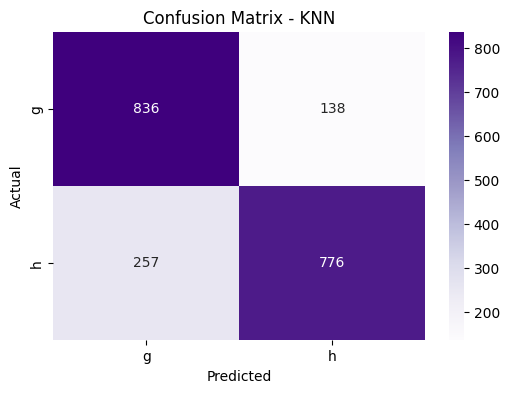

In [11]:
# Compute confusion matrix
cm_knn = confusion_matrix(y_test, y_knn_pred)

# Get unique class labels
labels = np.unique(y_test)

# Plot confusion matrix for KNN
plt.figure(figsize=(6,4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Purples', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()